In [16]:
#import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [17]:
df=pd.read_csv('Ames_dummy_UPDATE_8_10_21.csv',index_col=0)

In [18]:
df.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice', 'remodeled',
       'Age', 'RemodelAge', 'total_other_rooms', 'outdoorspace', 'reg_lot_shp',
       'leveled_land', 'culdsac', '1fam_hm', 'unf_attic', 'hip_roof',
       'premium_ext', 'exclnt_extr', 'cblock_foundation', 'pconc_foundation',
       'other_foundation', 'exclnt_bsmt', 'bsmt_exosure', 'bsmt_finished',
       'bsmt_rec', 'excellent_heating', 'central_AC', 'kitchen_exclnt',
       'fireplace_exclnt', 'attached_garage', 'finsihed_garage', 'pave_drive',
       'normal_sale', 'vnr_brk', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor

In [19]:
y=df['SalePrice']
X=df.drop(['SalePrice'], axis=1)

In [20]:
features=[c for c in df.columns if c !='SalePrice']

In [21]:
#train test split 
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)

In [22]:
tree=DecisionTreeRegressor().fit(X_train,y_train)

In [23]:
print("train set score: {:.2f}".format(tree.score(X_train,y_train)))
print("test set score: {:.2f}".format(tree.score(X_test,y_test)))

train set score: 1.00
test set score: 0.75


In [24]:
#depth=[1,5,10,15,20,25]
#for i in depth:
    #tree_depth= DecisionTreeRegressor(max_depth=i).fit(X_train,y_train)
    #print("tree max_depth " + str(i)+" train set score: {:.2f}".format(tree_depth.score(X_train,y_train)))
   # print("tree max_depth "+ str(i)+" test set score: {:.2f}".format(tree_depth.score(X_test,y_test)))
   

In [25]:
#nodes=[2,3,4,5,10,15,20,25,30]
#for i in nodes:
    #tree_nodes= DecisionTreeRegressor(max_leaf_nodes=i).fit(X_train,y_train)
    #print("tree max_nodes " + str(i)+" train set score: {:.2f}".format(tree_nodes.score(X_train,y_train)))
    #print("tree max_nodes "+ str(i)+" test set score: {:.2f}".format(tree_nodes.score(X_test,y_test)))
   

best set is  max nodes at 15 

In [26]:
#combine boths
nodes=[2,3,4,5,10,15,20,25,30]
depth=[1,5,10,15,20,25]
for n,d in list(itertools.product(nodes, depth)):
    tree_nodes= DecisionTreeRegressor(max_leaf_nodes=n,max_depth=d).fit(X_train,y_train)
    print("tree max_nodes " + str(n)+" max depth "+str(d)+" train set score: {:.2f}".format(tree_nodes.score(X_train,y_train)))
    print("tree max_nodes "+ str(n)+" max depth "+str(d)+" test set score: {:.2f}".format(tree_nodes.score(X_test,y_test)))

NameError: name 'itertools' is not defined

Best 
    tree max_nodes 25 max depth 15 train set score: 0.85
tree max_nodes 25 max depth 15 test set score: 0.83

In [27]:
best_tree= DecisionTreeRegressor(max_leaf_nodes=25,max_depth=15).fit(X_train,y_train)
print("tree max_nodes " + str(25)+" max depth "+str(15)+" train set score: {:.2f}".format(best_tree.score(X_train,y_train)))
print("tree max_nodes "+ str(25)+" max depth "+str(15)+" test set score: {:.2f}".format(best_tree.score(X_test,y_test)))



tree max_nodes 25 max depth 15 train set score: 0.85
tree max_nodes 25 max depth 15 test set score: 0.77


In [28]:
ridge_dict = {}
for coef, feat in zip(ridge.coef_,features):
    ridge_dict[feat] = coef

In [29]:

alpha=[.0001,.001,.01,.1,1,10,15,20,100]
for i in alpha:
    ridge= Ridge(alpha=i).fit(X_train,y_train)
    print("ridge alpha " + str(i)+" train set score: {:.2f}".format(ridge.score(X_train,y_train)))
    print("ridge alpha "+ str(i)+" test set score: {:.2f}".format(ridge.score(X_test,y_test)))

ridge alpha 0.0001 train set score: 0.87
ridge alpha 0.0001 test set score: 0.87
ridge alpha 0.001 train set score: 0.87
ridge alpha 0.001 test set score: 0.87
ridge alpha 0.01 train set score: 0.87
ridge alpha 0.01 test set score: 0.87
ridge alpha 0.1 train set score: 0.87
ridge alpha 0.1 test set score: 0.87
ridge alpha 1 train set score: 0.87
ridge alpha 1 test set score: 0.87
ridge alpha 10 train set score: 0.87
ridge alpha 10 test set score: 0.88
ridge alpha 15 train set score: 0.86
ridge alpha 15 test set score: 0.87
ridge alpha 20 train set score: 0.86
ridge alpha 20 test set score: 0.87
ridge alpha 100 train set score: 0.85
ridge alpha 100 test set score: 0.87


In [30]:
#10 is the best for ridge

In [31]:
lasso_dict = {}
for coef, feat in zip(lasso.coef_,features):
    lasso_dict[feat] = coef

NameError: name 'lasso' is not defined

In [32]:
alpha=[.0001,.001,.01,.1,1,10,100,1000]
for i in alpha:
    lasso= Lasso(alpha=i, max_iter=1000).fit(X_train,y_train)
    print("lasso alpha " + str(i)+" train set score: {:.2f}".format(lasso.score(X_train,y_train)))
    print("lasso alpha "+ str(i)+" test set score: {:.2f}".format(lasso.score(X_test,y_test)))
    print("lasso alpha "+ str(i)+ " number of features user: {}".format(np.sum(lasso.coef_!=0)))


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21881774056.588623, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(
/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21889255804.115234, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 0.0001 train set score: 0.87
lasso alpha 0.0001 test set score: 0.87
lasso alpha 0.0001 number of features user: 75
lasso alpha 0.001 train set score: 0.87
lasso alpha 0.001 test set score: 0.87
lasso alpha 0.001 number of features user: 75


/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21891948848.393555, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(
/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21911551610.265625, tolerance: 1332265093.5048566
  model = cd_fast.enet_coordinate_descent(


lasso alpha 0.01 train set score: 0.87
lasso alpha 0.01 test set score: 0.87
lasso alpha 0.01 number of features user: 75
lasso alpha 0.1 train set score: 0.87
lasso alpha 0.1 test set score: 0.87
lasso alpha 0.1 number of features user: 75
lasso alpha 1 train set score: 0.87
lasso alpha 1 test set score: 0.87
lasso alpha 1 number of features user: 73
lasso alpha 10 train set score: 0.87
lasso alpha 10 test set score: 0.87
lasso alpha 10 number of features user: 69
lasso alpha 100 train set score: 0.87
lasso alpha 100 test set score: 0.87
lasso alpha 100 number of features user: 51
lasso alpha 1000 train set score: 0.83
lasso alpha 1000 test set score: 0.85
lasso alpha 1000 number of features user: 29


In [33]:
#100 for lasso

In [34]:
#tree model 
best_tree= DecisionTreeRegressor(max_leaf_nodes=25,max_depth=15).fit(X_train,y_train)
print("tree max_nodes " + str(25)+" max depth "+str(15)+" train set score: {:.2f}".format(best_tree.score(X_train,y_train)))
print("tree max_nodes "+ str(25)+" max depth "+str(15)+" test set score: {:.2f}".format(best_tree.score(X_test,y_test)))


tree max_nodes 25 max depth 15 train set score: 0.85
tree max_nodes 25 max depth 15 test set score: 0.74


In [35]:
#Ridge
ridge_best= Ridge(alpha=10).fit(X_train,y_train)
print("ridge alpha " + str(10)+" train set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("ridge alpha "+ str(10)+" test set score: {:.2f}".format(ridge.score(X_test,y_test)))

ridge alpha 10 train set score: 0.85
ridge alpha 10 test set score: 0.87


In [36]:
#make dicitonary of coefficents 
ridge_dict = {}
for coef, feat in zip(ridge.coef_,features):
    ridge_dict[feat] = coef

In [37]:
ridge_dict

{'Lot Frontage': 33.06162699756847,
 'Lot Area': 0.43571444201863724,
 'Overall Qual': 13612.737026696965,
 'Overall Cond': 5143.386246515795,
 'Mas Vnr Area': 30.094064397580365,
 'BsmtFin SF 1': 12.24010786121677,
 'BsmtFin SF 2': 11.519081485931451,
 'Total Bsmt SF': 8.356882762488029,
 'Low Qual Fin SF': -22.79952160370942,
 'Gr Liv Area': 51.00813446508003,
 'Bsmt Full Bath': 4998.970729949693,
 'Full Bath': 2400.945184361236,
 'Half Bath': -499.8988769601793,
 'Bedroom AbvGr': -3418.2600622867053,
 'Kitchen AbvGr': -4711.466231174416,
 'Fireplaces': 2910.806938911878,
 'Garage Yr Blt': -7.91657541521547,
 'Garage Cars': 7018.9240521967295,
 'Garage Area': 19.680363055672935,
 'remodeled': 2047.720949563626,
 'Age': -377.91465767578165,
 'RemodelAge': -36.825860441111324,
 'total_other_rooms': -278.4578257690644,
 'outdoorspace': -1439.7109299814192,
 'reg_lot_shp': -2197.721022372275,
 'leveled_land': -1271.0782872126738,
 'culdsac': 5090.1667196399085,
 '1fam_hm': 14070.25615332

In [38]:
lasso=Lasso(alpha=100).fit(X_train,y_train)
print("train set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("lasso alpha "+ str(100)+ " number of features user: {}".format(np.sum(lasso.coef_!=0)))

train set score: 0.87
test set score: 0.87
lasso alpha 100 number of features user: 51


In [39]:
lasso_dict = {}
for coef, feat in zip(lasso.coef_,features):
    lasso_dict[feat] = coef

In [40]:
lasso_dict

{'Lot Frontage': 0.3749587700292674,
 'Lot Area': 0.43388549308853147,
 'Overall Qual': 12510.298861533867,
 'Overall Cond': 5416.168910632844,
 'Mas Vnr Area': 18.244423684651537,
 'BsmtFin SF 1': 12.588076123026646,
 'BsmtFin SF 2': 11.340814028836169,
 'Total Bsmt SF': 6.712796572357479,
 'Low Qual Fin SF': -16.339050030161836,
 'Gr Liv Area': 49.308215693109716,
 'Bsmt Full Bath': 5351.124323898292,
 'Full Bath': 4313.785989207741,
 'Half Bath': 310.817351168043,
 'Bedroom AbvGr': -3439.728851893553,
 'Kitchen AbvGr': -0.0,
 'Fireplaces': 3192.648591108798,
 'Garage Yr Blt': -7.7137877240017625,
 'Garage Cars': 9047.112710136576,
 'Garage Area': 9.318200596208422,
 'remodeled': 1282.869551313434,
 'Age': -356.8971577748744,
 'RemodelAge': -40.42064910302508,
 'total_other_rooms': -436.42972721380903,
 'outdoorspace': -1009.0066895644563,
 'reg_lot_shp': -0.0,
 'leveled_land': -0.0,
 'culdsac': 5108.760923998869,
 '1fam_hm': 23407.1168225688,
 'unf_attic': 0.0,
 'hip_roof': 7405.908

In [41]:
log_df=df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

/Users/jenniferarty/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
log_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,Low Qual Fin SF,Gr Liv Area,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2.149219,4.502017,0.778151,0.698970,2.049218,2.805501,-inf,3.033424,-inf,3.219060,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
1,1.903090,4.065281,0.698970,0.778151,-inf,2.670246,2.158362,2.945469,-inf,2.952308,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2,1.908485,4.154333,0.778151,0.778151,2.033424,2.965202,-inf,3.123525,-inf,3.123525,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
3,1.968483,4.047664,0.845098,0.698970,-inf,3.027350,-inf,3.324282,-inf,3.324282,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
4,1.869232,4.140822,0.698970,0.698970,-inf,2.898176,-inf,2.967548,-inf,3.211921,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1.568202,3.899656,0.778151,0.778151,-inf,2.913284,-inf,3.001301,-inf,3.001301,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2926,-inf,3.948657,0.698970,0.698970,-inf,2.478566,2.510545,2.936514,-inf,2.955207,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2927,1.792392,4.018742,0.698970,0.698970,-inf,2.527630,-inf,2.959995,-inf,2.986772,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
2928,1.886491,4.000434,0.698970,0.698970,-inf,3.029789,2.089905,3.142702,-inf,3.142702,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf


In [43]:
log_df.replace([np.inf, -np.inf], 0,inplace=True)

In [44]:
log_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Total Bsmt SF,Low Qual Fin SF,Gr Liv Area,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,2.149219,4.502017,0.778151,0.698970,2.049218,2.805501,0.000000,3.033424,0.0,3.219060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.903090,4.065281,0.698970,0.778151,0.000000,2.670246,2.158362,2.945469,0.0,2.952308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.908485,4.154333,0.778151,0.778151,2.033424,2.965202,0.000000,3.123525,0.0,3.123525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.968483,4.047664,0.845098,0.698970,0.000000,3.027350,0.000000,3.324282,0.0,3.324282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.869232,4.140822,0.698970,0.698970,0.000000,2.898176,0.000000,2.967548,0.0,3.211921,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
y2=log_df['SalePrice']
X2=log_df.drop(['SalePrice'], axis=1)

In [46]:
X_train2, X_test2, y_train2, y_test2= train_test_split(X2,y2,random_state=42)

In [48]:
alpha=[.0001,.001,.01,.1,1,10,100,1000]
for i in alpha:
    lasso= Lasso(alpha=i, max_iter=1000).fit(X_train2,y_train2)
    print("lasso alpha " + str(i)+" train set score: {:.2f}".format(lasso.score(X_train2,y_train2)))
    print("lasso alpha "+ str(i)+" test set score: {:.2f}".format(lasso.score(X_test2,y_test2)))
    print("lasso alpha "+ str(i)+ " number of features user: {}".format(np.sum(lasso.coef_!=0)))

lasso alpha 0.0001 train set score: 0.87
lasso alpha 0.0001 test set score: 0.89
lasso alpha 0.0001 number of features user: 19
lasso alpha 0.001 train set score: 0.85
lasso alpha 0.001 test set score: 0.88
lasso alpha 0.001 number of features user: 13
lasso alpha 0.01 train set score: 0.61
lasso alpha 0.01 test set score: 0.67
lasso alpha 0.01 number of features user: 8
lasso alpha 0.1 train set score: 0.00
lasso alpha 0.1 test set score: -0.00
lasso alpha 0.1 number of features user: 0
lasso alpha 1 train set score: 0.00
lasso alpha 1 test set score: -0.00
lasso alpha 1 number of features user: 0
lasso alpha 10 train set score: 0.00
lasso alpha 10 test set score: -0.00
lasso alpha 10 number of features user: 0
lasso alpha 100 train set score: 0.00
lasso alpha 100 test set score: -0.00
lasso alpha 100 number of features user: 0
lasso alpha 1000 train set score: 0.00
lasso alpha 1000 test set score: -0.00
lasso alpha 1000 number of features user: 0


In [49]:
alpha=[.0001,.001,.01,.1,1,10]
for i in alpha:
    ridge= Ridge(alpha=i).fit(X_train2,y_train2)
    print("ridge alpha " + str(i)+" train set score: {:.2f}".format(ridge.score(X_train2,y_train2)))
    print("ridge alpha "+ str(i)+" test set score: {:.2f}".format(ridge.score(X_test2,y_test2)))
   

ridge alpha 0.0001 train set score: 0.87
ridge alpha 0.0001 test set score: 0.90
ridge alpha 0.001 train set score: 0.87
ridge alpha 0.001 test set score: 0.90
ridge alpha 0.01 train set score: 0.87
ridge alpha 0.01 test set score: 0.90
ridge alpha 0.1 train set score: 0.87
ridge alpha 0.1 test set score: 0.90
ridge alpha 1 train set score: 0.87
ridge alpha 1 test set score: 0.90
ridge alpha 10 train set score: 0.85
ridge alpha 10 test set score: 0.88


In [51]:
#combine boths
nodes=[2,3,4,5,10,15,20,25,30]
depth=[1,5,10,15,20,25]
for n,d in list(itertools.product(nodes, depth)):
    tree_nodes= DecisionTreeRegressor(max_leaf_nodes=n,max_depth=d).fit(X_train2,y_train2)
    print("tree max_nodes " + str(n)+" max depth "+str(d)+" train set score: {:.2f}".format(tree_nodes.score(X_train2,y_train2)))
    print("tree max_nodes "+ str(n)+" max depth "+str(d)+" test set score: {:.2f}".format(tree_nodes.score(X_test2,y_test2)))

NameError: name 'itertools' is not defined

In [67]:
ridge_2= Ridge(alpha=.0001).fit(X_train2,y_train2)
print("ridge alpha " + str(i)+" train set score: {:.2f}".format(ridge.score(X_train2,y_train2)))
print("ridge alpha "+ str(i)+" test set score: {:.2f}".format(ridge.score(X_test2,y_test2)))

ridge alpha 10 train set score: 0.85
ridge alpha 10 test set score: 0.88


In [72]:
def basis_plot(model,title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(X[:, np.newaxis], y)
    ax[0].scatter(X, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='X', ylabel='y', ylim=(-1.5, 1.5))
    
    if title: 
        ax[0].set_title(title)
        ax[1].plot(model.steps[0][1].centers_,
                   model.steps[1][1].coef_)
        ax[1].set(xlabel='basis location',
                  ylabel='coefficient',
                  xlim=(0, 10))
            

TypeError: '(slice(None, None, None), None)' is an invalid key

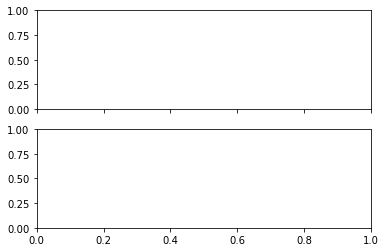

In [73]:
#model = make_pipeline(GaussianFeatures(30), LinearRegression()) 
ridge_2.fit(X[:,np.newaxis],y)
plt.scatter(X,y)
plt.plot()

In [99]:
ridge_dict_2 = {}
for coef, feat in zip(ridge_2.coef_,features):
    ridge_dict_2[feat] = coef

In [100]:
ridge_dict_2

{'Lot Frontage': 0.00018054008469945007,
 'Lot Area': 0.09895463130834317,
 'Overall Qual': 0.33309332840339834,
 'Overall Cond': 0.23413882155429608,
 'Mas Vnr Area': -0.001782088976937681,
 'BsmtFin SF 1': 0.006920730215939051,
 'BsmtFin SF 2': 0.0005619025898410024,
 'Total Bsmt SF': 0.00928135815931433,
 'Low Qual Fin SF': -0.005775155527150294,
 'Gr Liv Area': 0.4428670914560769,
 'Bsmt Full Bath': 0.016380311956283228,
 'Full Bath': 0.03154542130295331,
 'Half Bath': -0.0014929580534158479,
 'Bedroom AbvGr': -0.041319198286078336,
 'Kitchen AbvGr': -0.015431466865654156,
 'Fireplaces': 0.013965055194908491,
 'Garage Yr Blt': -0.01147165912496397,
 'Garage Cars': 0.049687981987665365,
 'Garage Area': 0.002529939835067441,
 'remodeled': -0.0016403922553011028,
 'Age': -0.05462097217190261,
 'RemodelAge': -0.0059988032820301,
 'total_other_rooms': -0.012960229355313218,
 'outdoorspace': 0.0036123783847289417,
 'reg_lot_shp': 0.0012525684447292746,
 'leveled_land': 0.0042514469202318

In [102]:
dict(sorted(ridge_dict_2.items(), key=lambda item: item[1]))

{'Neighborhood_IDOTRR': -0.07011041670227752,
 'Neighborhood_MeadowV': -0.055582187038986076,
 'Age': -0.05462097217190261,
 'Neighborhood_OldTown': -0.05309386322543804,
 'Bedroom AbvGr': -0.041319198286078336,
 'Neighborhood_Edwards': -0.04127736768539689,
 'Neighborhood_Gilbert': -0.03639748315569726,
 'Neighborhood_Landmrk': -0.03559955161668851,
 'Neighborhood_NWAmes': -0.03145305478022643,
 'Neighborhood_SawyerW': -0.030350707408820714,
 'Neighborhood_SWISU': -0.02474745761543525,
 'Neighborhood_CollgCr': -0.02259305845713435,
 'Neighborhood_Blueste': -0.021189568152263184,
 'Neighborhood_Mitchel': -0.021030450699073517,
 'Neighborhood_NAmes': -0.020747995432721635,
 'Neighborhood_BrDale': -0.020144643820888097,
 'Neighborhood_BrkSide': -0.01876344922969354,
 'Neighborhood_Sawyer': -0.018423904992444364,
 'Kitchen AbvGr': -0.015431466865654156,
 'total_other_rooms': -0.012960229355313218,
 'Garage Yr Blt': -0.01147165912496397,
 'Neighborhood_ClearCr': -0.008575873401656648,
 'ot

Coefficients: 
 [-0.0012445   0.12333528  0.46701599  0.26044122  0.00282718  0.01837349
  0.00475204  0.01410799 -0.0102863   0.47639669  0.03960359  0.02681507
 -0.09552647 -0.07475167 -0.12174718  0.068964   -0.00281885  0.06148896
  0.01228772 -0.00337431 -0.09415412 -0.01143873 -0.00729372  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


ValueError: x and y must be the same size

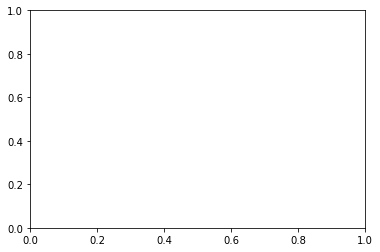

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()